In [49]:
from cmdstanpy import CmdStanModel

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

### Prepare N, F, L parameter

In [62]:
F = len('Bartosz')
L = len('Sroka')
N = 100 * (F + L)
print("F:", F, '\tL:', L, '\tN:', N)

F: 7 	L: 5 	N: 1200


### Exercise 1 - Generate data:

In [51]:
model_code_1 = CmdStanModel(stan_file='code_1.stan')

samples_code_1 = model_code_1.sample(data={'N' : N},
                                     fixed_param=True, 
                                     iter_sampling=1,
                                     iter_warmup=0,
                                     seed=20001113, 
                                     chains = 1)
df_1 = samples_code_1.draws_pd()
data_sim_1 = {'N' : N,
              'y' :  df_1.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N))}

df_1.head()



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,0.62196,-0.759401,-1.21491,-0.568308,0.005894,-1.93023,-2.61568,...,-1.09872,-1.05991,-1.45674,0.362035,0.174837,0.351382,1.66043,-0.508551,0.966138,-0.62632


In [52]:
model_code_2 = CmdStanModel(stan_file='code_2.stan')

samples_code_2 = model_code_2.sample(data={'N' : N},
                                     fixed_param=True, 
                                     iter_sampling=1,
                                     iter_warmup=0,
                                     seed=20001113, 
                                     chains = 1)
df_2 = samples_code_2.draws_pd()
df_2.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.62196,-0.519853,-1.32203,0.172803,-1.3443,0.853819,0.659279,-0.514096,...,-1.17553,1.93014,2.05379,-1.35587,-2.06973,0.109086,3.26317,-1.8683,7.03146,-0.913106


### Exercise 2

In [53]:
model_code_3 = CmdStanModel(stan_file='code_3.stan')
samples_code_3 = model_code_3.sample(data=data_sim_1)
df_3 = samples_code_3.draws_pd()
df_3.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-2285.38,0.638053,0.805087,1.0,3.0,0.0,2289.95,1.56869,0.147555,-1.41491,...,-1.907660,-0.425087,1.077240,1.088440,-1.672060,-0.812481,-1.518830,-0.418557,-2.750930,-1.41623
1,-2283.94,1.000000,0.805087,2.0,3.0,0.0,2285.30,1.60849,0.131955,-1.44064,...,1.249650,-0.390627,0.044222,0.128508,-0.372096,3.195920,0.380385,3.881140,-0.422102,-1.01696
2,-2283.96,0.988521,0.805087,3.0,7.0,0.0,2284.11,1.63529,0.103573,-1.46100,...,1.568760,-1.408470,-0.838489,-2.724720,0.605084,-0.066886,0.006196,-0.549229,-1.916810,1.44630
3,-2284.74,0.784208,0.805087,1.0,3.0,0.0,2286.43,1.60043,0.173646,-1.42844,...,-0.341634,1.185350,1.286570,0.352026,0.898090,-1.680050,-1.802900,-0.627323,-1.622530,1.42658
4,-2286.21,0.825395,0.805087,2.0,3.0,0.0,2287.21,1.56499,0.177131,-1.40722,...,0.732185,-0.168448,-1.429930,0.027616,-0.254419,1.216350,-0.645360,1.289110,0.570988,0.76352


In [54]:
model_code_4 = CmdStanModel(stan_file='code_4.stan')
samples_code_4 = model_code_4.sample(data=data_sim_1)
df_4 = samples_code_4.draws_pd()
df_4.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed             


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1852.11,0.748609,0.687764,2.0,3.0,0.0,1857.91,0.918313,-0.002655,4.83281,...,1.760770,0.665034,-0.072641,-0.784288,0.404906,1.391750,-1.328310,0.258447,0.423637,2.542150
1,-1853.26,0.942314,0.687764,2.0,7.0,0.0,1853.82,0.932119,0.040029,5.00691,...,0.602127,-2.185470,-0.058303,-0.289177,-0.457673,0.938393,-1.171370,-0.189333,0.529089,-0.765036
2,-1853.10,0.698971,0.687764,2.0,7.0,0.0,1857.48,0.849815,-0.045666,3.85108,...,-0.258608,2.141150,0.487906,0.876288,1.637270,0.732615,0.689702,-0.175215,0.320164,-0.937604
3,-1852.35,0.941359,0.687764,3.0,7.0,0.0,1854.97,0.925191,0.007274,4.86665,...,-0.287855,-0.391143,-0.041574,-0.306281,1.207770,-0.422025,-0.275516,0.691283,-1.000070,0.288794
4,-1851.38,1.000000,0.687764,3.0,7.0,0.0,1852.33,0.853023,0.011887,3.97403,...,-0.053664,-0.552729,0.108690,0.330723,1.205750,-0.793671,-0.453249,0.255472,-0.708144,-0.197341


In [55]:
compare_model_loo = az.compare(
    {"Normal model": az.from_cmdstanpy(samples_code_3),
    "Student model": az.from_cmdstanpy(samples_code_4)},
    ic="loo",
    scale="deviance")
compare_model_loo.head()

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student model,0,3705.635646,4.721107,0.000000,1.000000e+00,76.795693,0.000000,False,deviance
Normal model,1,4607.249697,38.676823,901.614051,3.081766e-10,328.051043,277.836609,True,deviance


In [56]:
compare_model_waic = az.compare(
    {"Normal model": az.from_cmdstanpy(samples_code_3),
    "Student model": az.from_cmdstanpy(samples_code_4)},
    ic="waic",
    scale="deviance")
compare_model_waic.head()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Student model,0,3705.623914,4.715241,0.000000,1.000000e+00,76.792018,0.000000,True,deviance
Normal model,1,4608.388883,39.246416,902.764969,5.235279e-10,329.039590,278.894061,True,deviance


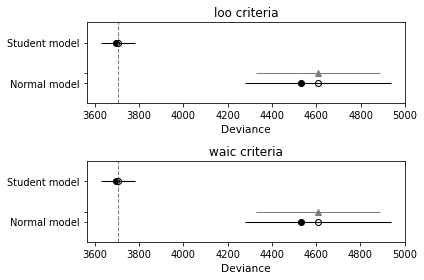

In [57]:
_, ax = plt.subplots(nrows=2, ncols=1)
az.plot_compare(compare_model_loo, insample_dev=True, ax=ax[0])
ax[0].set_title("loo criteria")
az.plot_compare(compare_model_waic, insample_dev=True, ax=ax[1])
ax[1].set_title("waic criteria")
plt.tight_layout()
plt.show()

Student model is simpler and has lower LOO and WAIC criteria. This indicates an advantage of a simpler model.

### Exercise 3:

In [58]:
model_code_5 = CmdStanModel(stan_file='code_5.stan')
data_sim_5_1 = {'N': N, 
                'K': 1,
                'y': df_2.loc[:, 'y[1]' : f'y[{N}]'].values.reshape((N)), 
                'X': df_2.loc[:, 'X[1,1]' : f'X[{N},1]'].values.reshape((N, 1))}
samples_code_5_1 = model_code_5.sample(data=data_sim_5_1)

data_sim_5_2 = {'N': N, 
                'K': 2, 
                'y': df_2.loc[:, 'y[1]' : f'y[{N}]'].values.reshape((N)), 
                'X': df_2.loc[:, 'X[1,1]' : f'X[{N},2]'].values.reshape((N, 2))}
samples_code_5_2 = model_code_5.sample(data=data_sim_5_2)

data_sim_5_3 = {'N': N, 
                'K': 3, 
                'y': df_2.loc[:, 'y[1]' : f'y[{N}]'].values.reshape((N)), 
                'X': df_2.loc[:, 'X[1,1]' : f'X[{N},3]'].values.reshape((N, 3))}
samples_code_5_3 = model_code_5.sample(data=data_sim_5_3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampl


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:07 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:07 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:08 Iteration: 1900 


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:07 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:07 Iteration: 1800 / 200


INFO:cmdstanpy:CmdStan done processing.


In [59]:
compare_model_loo = az.compare(
    {"predictor 1": az.from_cmdstanpy(samples_code_5_1), 
     "predictor 2": az.from_cmdstanpy(samples_code_5_2), 
     "predictor 3": az.from_cmdstanpy(samples_code_5_3)},
    ic="loo",
    scale="deviance")
compare_model_loo.head()

compare_model_waic = az.compare(
    {"predictor 1": az.from_cmdstanpy(samples_code_5_1), 
     "predictor 2": az.from_cmdstanpy(samples_code_5_2), 
     "predictor 3": az.from_cmdstanpy(samples_code_5_3)},
    ic="waic",
    scale="deviance")
compare_model_waic.head()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
predictor 1,0,4507.261405,1.863989,0.000000,1.000000e+00,45.825277,0.000000,False,deviance
predictor 3,1,5644.093018,4.178589,1136.831613,2.531059e-14,48.467191,50.883091,False,deviance
predictor 2,2,5645.747390,3.027383,1138.485985,0.000000e+00,48.447113,50.630074,False,deviance


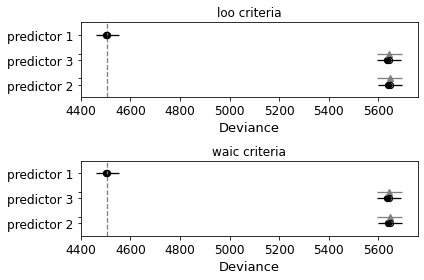

In [60]:
_, ax = plt.subplots(nrows=2, ncols=1)
az.plot_compare(compare_model_loo, insample_dev=True, ax=ax[0])
ax[0].set_title("loo criteria")
az.plot_compare(compare_model_waic, insample_dev=True, ax=ax[1])
ax[1].set_title("waic criteria")
plt.tight_layout()
plt.show()

Model with a single predictor has the lowest metrics, therefore it is the best among the analyzed models